In [1]:
import pandas as pd
card = pd.read_csv('cc_info.csv')
trans = pd.read_csv('transactions.csv')

In [2]:
card.shape

(984, 5)

In [3]:
trans.shape

(294588, 5)

In [4]:
card.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [8]:
card.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [9]:
trans.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


# data manipulation

In [7]:
import math
from math import radians, cos, sin, asin, sqrt, atan2 
def haversine(lon1, lat1, lon2, lat2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [3]:
from datetime import datetime
for index, row in trans.iterrows():
    trans.at[index, 'month'] = int(row['date'][5:7])
    trans.at[index,'date'] = datetime.strptime(row['date'], '%Y-%m-%d %H:%M:%S')
    

In [8]:
for i in trans['credit_card'].unique():
    temp = trans[trans['credit_card']==i]
    temp.sort_values('date', inplace=True)
    #date=datetime.strptime('2015-07-31 00:00:00', '%Y-%m-%d %H:%M:%S')
    creditcard=0
    count = 0
    for index, row in temp.iterrows():
        count+=1
        if count%100==0:
            print(count)
        if row['credit_card']==creditcard:
            datedelta = (row['date']-date).days*24+(row['date']-date).seconds/3600
            distance = haversine(long, lat, row['Long'], row['Lat'])
            if datedelta==0:
                trans.at[index, 'speed'] = 99999
            else:
                trans.at[index, 'speed'] = distance/datedelta
        creditcard = row['credit_card']
        date = row['date']
        lat = row['Lat']
        long = row['Long']

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


100
200
100
200
300
100
200
300
400
500
100
200
300
400
100
200
100
200
100
200
300
400
100
200
300
400
500
100
200
300
400
100
200
100
200
300
100
200
300
400
500
600
100
200
300
400
100
200
100
200
300
100
200
300
100
200
300
400
500
100
200
300
400
100
200
300
400
500
100
100
200
300
100
200
100
200
300
400
500
100
200
300
400
500
100
200
300
400
100
200
300
400
100
200
100
200
300
100
200
300
100
200
100
200
300
400
500
100
200
100
100
200
300
100
200
300
400
100
100
200
300
400
100
200
300
400
500
100
200
300
400
100
200
300
400
100
200
300
100
200
300
400
500
100
200
300
100
200
300
400
500
100
200
300
400
500
100
100
100
200
300
400
100
200
300
100
200
100
200
100
100
100
200
100
200
300
400
100
100
200
300
400
500
100
200
300
400
100
200
300
100
200
300
400
500
100
200
300
400
500
600
100
200
100
200
300
100
200
300
100
100
200
100
200
300
100
200
300
400
500
600
100
200
300
400
100
200
300
400
500
600
100
200
300
100
200
300
400
100
100
100
100
100
100
200
300
400
100
100
200


100
200
300
100
200
300
400
500
100
200
100
200
300
400
500
100
200
300
400
500
100
200
300
100
200
300
100
200
300
400
500
100
100
200
300
400
100
200
300
400
100
200
300
100
200
300
400
500
100
200
300
400
500
100
200
300
100
200
300
100
200
300
400
500
100
200
300
100
200
300
400
100
200
300
400
500
100
200
300
400
500
100
200
300
100
200
300
400
100
100
200
300
400
100
200
300
400
100
200
300
400
100
200
300
100
200
100
200
300
400
500
100
200
300
100
100
200
100
200
300
400
500
100
200
300
400
500
600
100
100
100
200
100
200
300
400
500
100
200
100
100
100
100
100
200
100
100
200
300
400
500
100
200
300
400
500
100
200
300
400
500
100
200
100
200
300
400
500
100
200
300
100
100
200
300
400
100
200
300
400
100
100
200
300
400
100
200
300
400
500
100
200
300
400
500
100
200
300
400
500
100
100
200
300
400
500
100
200
300
400
500
100
100
200
100
200
300
400
100
200
100
100
200
100
200
100
200
300
400
500
100
200
300
400
500
100
200
300
400
100
100
200
100
200
300
400
100
200
300
400


In [86]:
trans.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,month,speed
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9.0,1.134822
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10.0,7.930716
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10.0,0.797214
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10.0,2.036966
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10.0,9.069078


In [9]:
combine = trans.join(card.set_index('credit_card'), on='credit_card')
combine = combine.drop(['state', 'zipcode'], axis = 1)

In [10]:
neverexceed=[]
for i in trans['credit_card'].unique():
    flag = 1
    for j in [7,8,9,10]:
        temp = trans[(trans['credit_card']==i) & (trans['month']==j)]
        temp.sort_values('date', inplace=True)
        limit = card['credit_card_limit'][card['credit_card']==i].tolist()[0]
        spend=0
        for index, row in temp.iterrows():
            spend+=row['transaction_dollar_amount']
            if spend>limit:
                flag=0
                trans.at[index,'above']='y'
            else:
                trans.at[index,'above']='n'
    if flag:
        neverexceed.append(i)
        print(i)
        
#print the credit card never exceed limit

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1003715054175576
1013870087888817
1023820165155391
1073931538936472
1077622576192810
1087468642191606
1089479586475600
1101164752077181
1107936587129946
1126571863414211
1128536627506856
1134742235676586
1137926374621536
1144894232607400
1155726765596507
1156998467006869
1165413984579076
1167475218806361
1169271395749970
1191702776174515
1210872963953886
1221421251374063
1222730774437945
1224132812823172
1228288249952859
1250832548098023
1254472912142815
1261411767321605
1264384810841217
1281918894315694
1284450389976622
1295205764436116
1301519430111888
1312823087473107
1326817464191542
1337293370722685
1363526625562684
1368742094369263
1375199270298437
1380553699881195
1388343943378591
1402909379316770
1409322756311484
1420382222148431
1428403246999020
1459700728665333
1461675388467265
1464551767416747
1468686791689484
1475826831184689
1488824811225438
1489635379898079
1492903951796501
1498307521782517
1501541842357388
1505998080559428
1508274565891207
1538309249157612
15405711646490

5808568142475251
5814955316793393
5827454659596708
5828448317363869
5836753091038481
5849111629036386
5862371394578648
5864242444135997
5872602762998578
5876686859794608
5891245628237787
5918282832042862
5924922891293495
5929569085404951
5930630722779265
5948940271342611
5960629082676983
5961248174929633
5993120257934794
5999629725471339
6013984457072930
6058125552802074
6063334769611138
6075288092815423
6120484619552052
6126515498577720
6154164379665055
6156698325995733
6160860237001016
6161580285936095
6162758085256721
6164143160904912
6186951577719336
6201975636402458
6202290276245949
6205219558117674
6214915371897876
6215912685151625
6216751190381521
6225921585766163
6235292123992652
6239589776969686
6244656436085734
6245684915925010
6256736424616777
6266705123601799
6270963060103806
6286633870767123
6295994752468225
6303154567927815
6310725288144157
6319530478989228
6325419957422105
6354366482171744
6379790667727929
6388959096068998
6400102930973570
6404482075284890
64226518958480

In [11]:
for index, row in trans.iterrows():
    trans.at[index, 'weekday'] = row['date'].weekday()

In [12]:
for i in trans['credit_card'].unique():
    temp = trans[trans['credit_card']==i]
    temp.sort_values('date', inplace=True)
    #date=datetime.strptime('2015-07-31 00:00:00', '%Y-%m-%d %H:%M:%S')
    creditcard=0
    count = 0
    for index, row in temp.iterrows():
        if row['credit_card']==creditcard:
            trans.at[index, 'timedelta/h'] = (row['date']-date).days*24+(row['date']-date).seconds/3600
        creditcard = row['credit_card']
        date = row['date']

/Users/yiyuanfeng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
for index, row in trans.iterrows():
    if row['date'].hour>=0 and row['date'].hour<6:
        trans.at[index, 'period'] = 'midnight'
    elif row['date'].hour>=6 and row['date'].hour<12:
        trans.at[index, 'period'] = 'morning'
    elif row['date'].hour>=12 and row['date'].hour<6:
        trans.at[index, 'period'] = 'afternoon'
    else:
        trans.at[index, 'period'] = 'night'

In [14]:
trans.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,month,speed,above,weekday,timedelta/h,period
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9.0,1.134822,n,4.0,4.650278,midnight
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10.0,7.930716,n,5.0,0.806944,night
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10.0,0.797214,n,0.0,18.509167,night
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10.0,2.036966,n,3.0,2.003056,night
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10.0,9.069078,n,0.0,1.812778,night


In [15]:
trans.to_csv('manipulated.csv')

# model

In [28]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
l = [3,7,10]
trans = pd.read_csv('manipulated.csv')
kpdata = trans.iloc[:,l]
kpdata = kpdata.dropna()
#kpdata = kpdata[kpdata['credit_card']==1003715054175576]
#kpdata = kpdata.drop('credit_card', axis = 1)
scaler = MinMaxScaler()
s=[0,1,2]
scaler.fit(kpdata.iloc[:,s])
kpdata.iloc[:,s] = scaler.transform(kpdata.iloc[:,s])
kpdata.head()

,transaction_dollar_amount,speed,timedelta/h
0,0.043772,1.779125e-08,0.004640
1,0.103144,1.243667e-07,0.000805
2,0.048542,1.249678e-08,0.018469
3,0.136175,3.193897e-08,0.001999
4,0.071813,1.422189e-07,0.001809


In [67]:
#KMEANS
t = kpdata
kmeans = KMeans(n_clusters=2)
kmeans.fit(t)
t['category'] = kmeans.labels_

In [55]:
#KPROTOTYPE
import numpy as np
from kmodes.kprototypes import KPrototypes

# stocks with their market caps, sectors and countries
X = np.array(kpdata)


kproto = KPrototypes(n_clusters=2, init='Cao',n_init=10, verbose=2)
clusters = kproto.fit_predict(X, categorical=[4,5,7])

# Print cluster centroids of the trained model.
#print(kproto.cluster_centroids_)
# Print training statistics
#print(kproto.cost_)
#print(kproto.n_iter_)

category=[]
for c in zip(clusters):
    category.append(c)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 27, ncost: 53.909668526161596
Run: 1, iteration: 2/100, moves: 14, ncost: 53.89163158443301
Run: 1, iteration: 3/100, moves: 0, ncost: 53.89163158443301


In [56]:
kpdata['category'] = category

In [57]:
ind = []
dabove={'n':0,'y':1}
dperiod = {'morning':0, 'afternoon':0.25, 'night':0.5, 'midnight':0.75}
dweekday = {0:0.15,1:0.3, 2:0.45, 3:0.6, 4:0.75, 5:0.9, 6:1.05}
for index, row in kpdata.iterrows():
    kpdata.at[index,'above'] = dabove[row['above']]
    kpdata.at[index,'period'] = dperiod[row['period']]
    kpdata.at[index,'weekday'] = dweekday[row['weekday']]
    if index%40==0:
        ind.append(index)
t = kpdata.loc[ind]

# iloc是第几个 loc是index

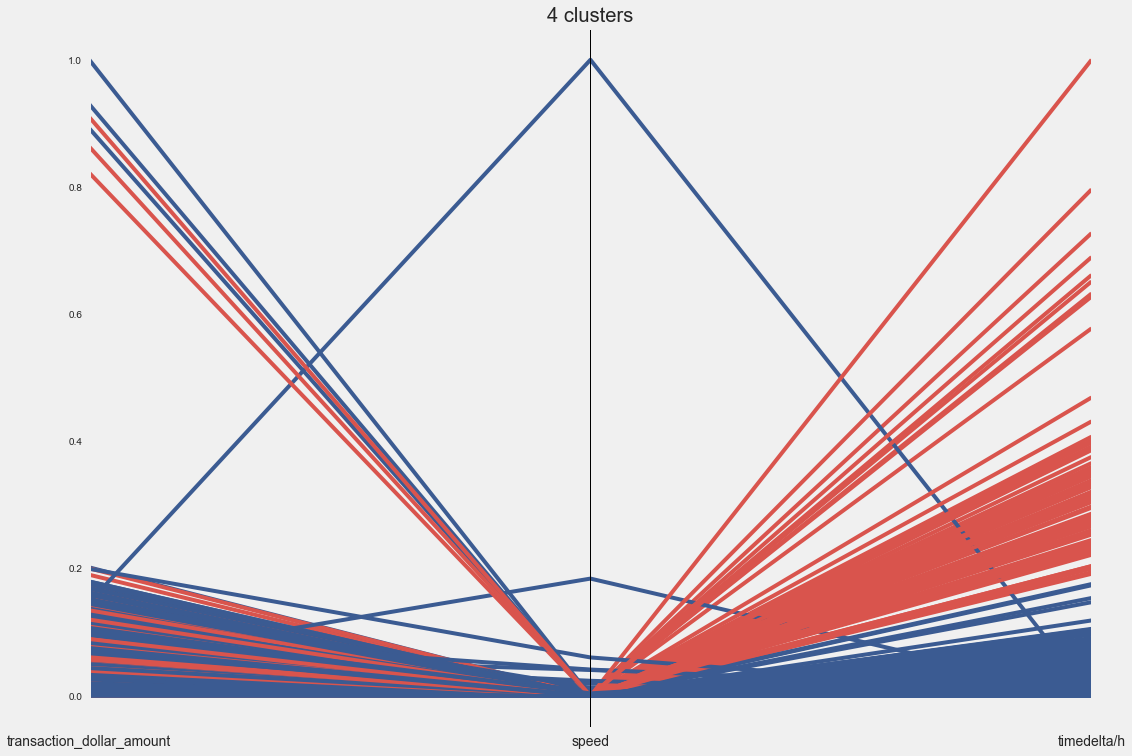

In [68]:

plt.style.use('fivethirtyeight')

plt.figure(figsize=(16, 12))
plt.title('4 clusters')
cc = ["denim blue",'pale red', "amber", "greyish", "faded green", "dusty purple"]
c = sns.xkcd_palette(cc)
plt.xticks(rotation=0,fontsize=14)
parallel_coordinates(t, 'category',color=c)
plt.legend([])

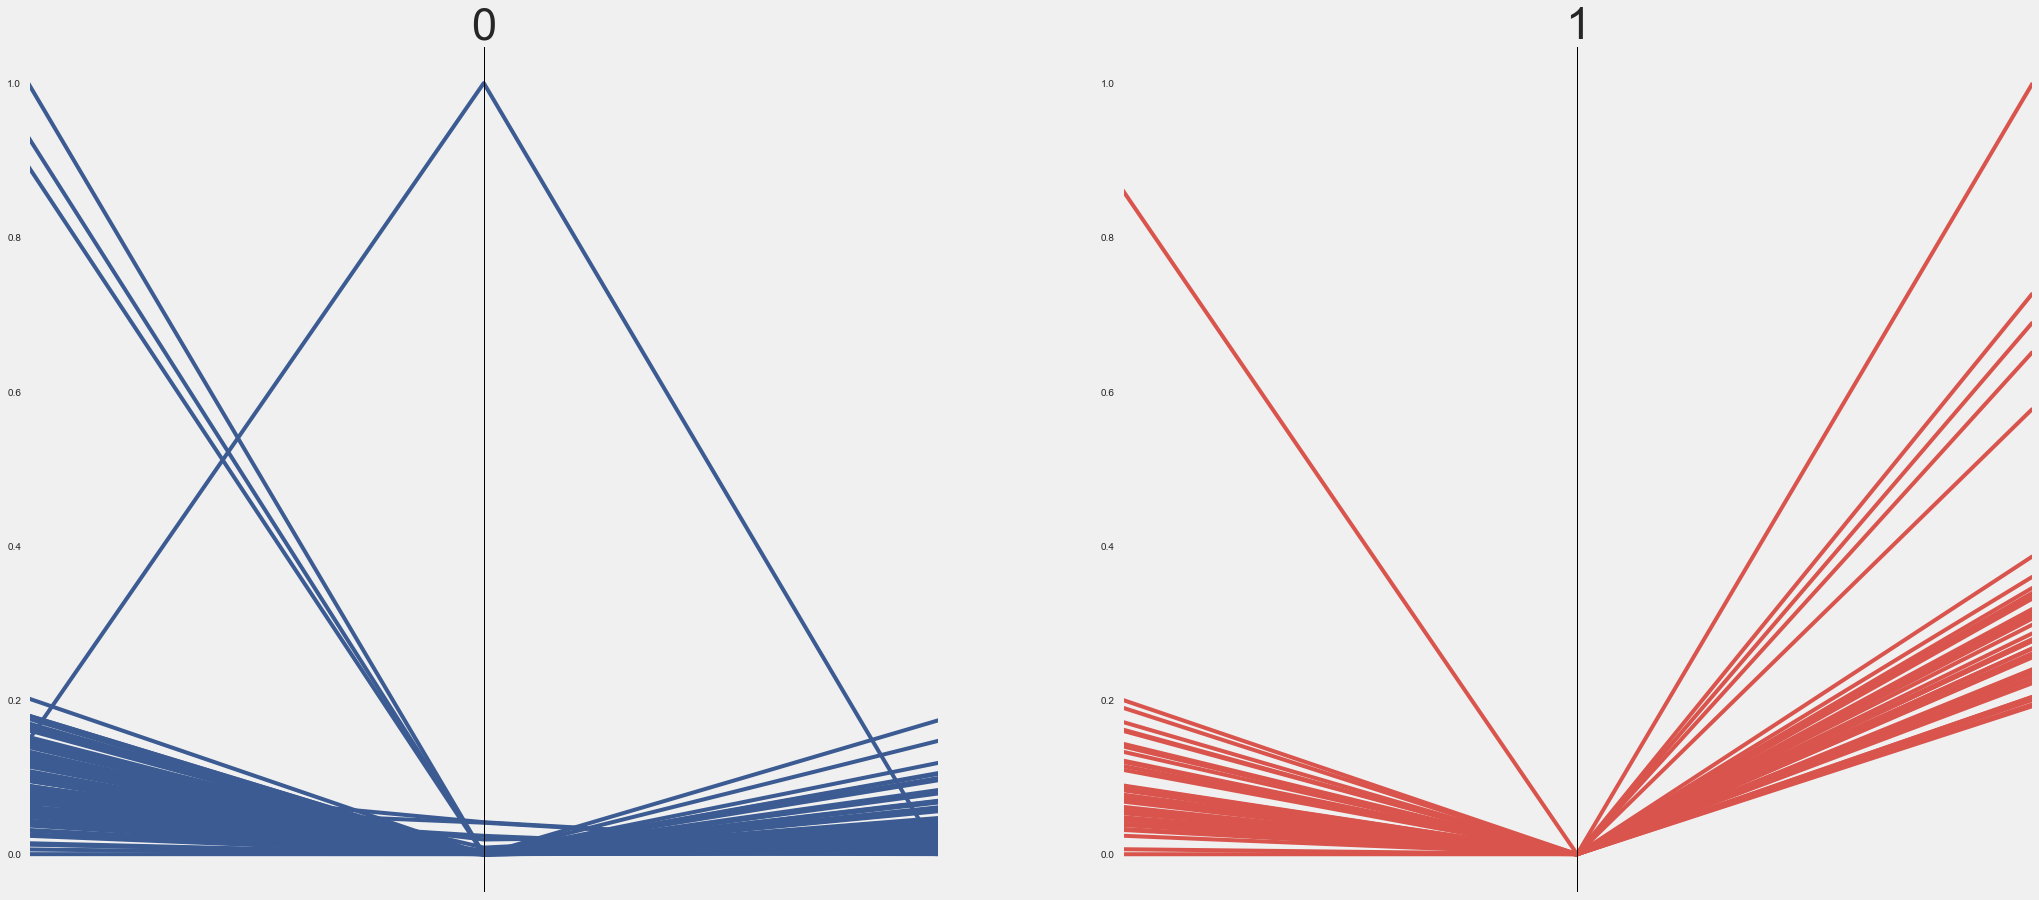

In [69]:
ind = []
for index, row in kpdata.iterrows():
    if index%2==0:
        ind.append(index)
t = kpdata.loc[ind]
plt.figure(figsize=(32, 32))
plt.style.use('fivethirtyeight')
cc = ["denim blue", "amber", "greyish", "faded green", "dusty purple", "pale red"]
c = sns.xkcd_palette(cc)

# CLUSTER = 0
plt.subplot(221)
parallel_coordinates(t[t['category']==(0,)], 'category',color=sns.xkcd_palette(["denim blue"]))
#plt.title("Small Cap Specialists w/ Large Cap + \n Relocation Experience (Cluster = 0)")
plt.title("0",fontsize=45)
plt.xticks([])
plt.legend([])


# CLUSTER = 1
plt.subplot(222)
parallel_coordinates(t[t['category']==(1,)], 'category',color=sns.xkcd_palette(["pale red"]))
plt.title("1",fontsize=45)
plt.xticks([])
plt.legend([])


# # CLUSTER = 2
# plt.subplot(223)
# parallel_coordinates(t[t['clusters']==2], 'clusters',color=sns.xkcd_palette(["faded green"]))
# plt.title("Maintenance Specialists",fontsize=45)
# plt.xticks(rotation=45,fontsize=35)
# plt.legend([])


# # CLUSTER = 3
# plt.subplot(224)
# parallel_coordinates(t[t['clusters']==0], 'clusters',color=sns.xkcd_palette(["greyish"]))
# plt.title("Generalists",fontsize=45)
# plt.xticks(rotation=45,fontsize=35)
# plt.legend([])


In [70]:
trans.loc[t[t['category']==(0,)].index]

,credit_card,date,transaction_dollar_amount,Long,Lat,month,speed,above,weekday,timedelta/h,period
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9.0,1.134822,n,4.0,4.650278,midnight
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10.0,9.069078,n,0.0,1.812778,night
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928,8.0,4.007559,n,5.0,1.924167,night
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015,9.0,2465.580814,n,3.0,2.688889,night
12,1003715054175576,2015-10-01 20:58:34,69.77,-80.297125,40.276976,10.0,35.700227,n,3.0,0.240278,night
14,1003715054175576,2015-09-18 21:44:21,146.75,69.475216,25.125749,9.0,4779.847688,n,4.0,2.533611,night
16,1003715054175576,2015-10-05 12:17:17,133.34,-80.265055,40.198392,10.0,0.765426,n,0.0,9.858889,night
18,1003715054175576,2015-09-09 01:12:17,101.32,-80.224045,40.265134,9.0,1.712017,n,2.0,3.738056,midnight
20,1003715054175576,2015-09-18 17:38:43,148.62,-80.279352,40.279824,9.0,8.400262,n,4.0,0.883611,night
24,1003715054175576,2015-08-27 21:34:58,89.01,-80.221092,40.197990,8.0,5.523065,n,3.0,1.559167,night


In [5]:
import pandas as pd
df = pd.read_csv('manipulated.csv')
df.head()

,Unnamed: 0,credit_card,date,transaction_dollar_amount,Long,Lat,month,speed,above,weekday,timedelta/h,period
0,0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9.0,1.134822,n,4.0,4.650278,midnight
1,1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10.0,7.930716,n,5.0,0.806944,night
2,2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10.0,0.797214,n,0.0,18.509167,night
3,3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10.0,2.036966,n,3.0,2.003056,night
4,4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10.0,9.069078,n,0.0,1.812778,night


In [6]:
df = df.drop(['Unnamed: 0', 'credit_card', 'date','Long', 'Lat', 'month', 'period','above' ], axis = 1)

In [9]:
import itertools
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
df = df.dropna()
df = scale(df)

In [10]:
pca = PCA(n_components=2)
X2d = pca.fit_transform(df)
X2d = pd.DataFrame(X2d,columns=['pc1','pc2'])

In [11]:
plt.scatter(X2d.pc1,X2d.pc2,alpha=0.3)

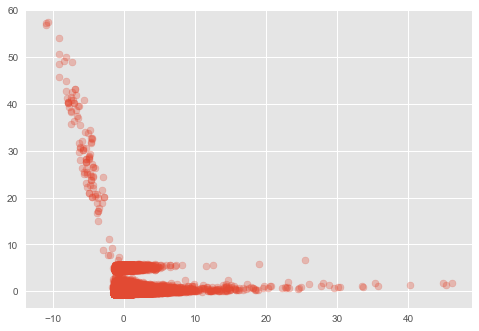

In [12]:
plt.show()

In [29]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters,n_init=10, n_jobs=-1)
ind=[]
# for i in range(df.shape[0]):
#     if i%100==0:
#         ind.append(i) 
kmeans.fit(kpdata)

Process ForkPoolWorker-46:
Process ForkPoolWorker-47:
Process ForkPoolWorker-48:
Process ForkPoolWorker-45:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/yiyuanfeng/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/yiyuanfeng/anaconda/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()


KeyboardInterrupt: 

In [ ]:
X2d['label'] = kmeans.labels_
print X2d.label.value_counts()

In [ ]:
colors = itertools.cycle( ['r','g','b','c','m','y','k'] )

plt.rc('figure',figsize=(10,6))
for label in  xrange(n_clusters) :
    temp = X2d.loc[X2d.label == label,:]
    plt.scatter(temp.pc1,temp.pc2,c=next(colors),label=label,alpha=0.3)

plt.legend(loc='best')

In [18]:
df

array([[-0.33875025, -0.02010007,  0.40343347, -0.16407573],
       [ 0.13753768, -0.02009036,  0.97059355, -0.4182007 ],
       [-0.30048356, -0.02010055, -1.86520684,  0.75228763],
       ...,
       [-0.06791514, -0.02010031, -1.29804676,  0.72765756],
       [ 0.46565249, -0.02009611, -0.16372661, -0.32441911],
       [ 0.5483631 , -0.02010101,  0.97059355,  1.34794584]])

In [30]:
import torch
print(torch.__version__)

0.3.1.post2
